We use the disk wind model used previously with a single layer:

  0%|          | 0/564289 [00:00<?, ?it/s]

Setting up the resolution
Final array size : (2000 , 360 , 1)
                                                              THE DATA IS 22.0 MB                                                              
                                                        TRANSFORMING INTO PPV OF 6.0 MB                                                        


100%|██████████| 564289/564289 [00:00<00:00, 1061645.52it/s]


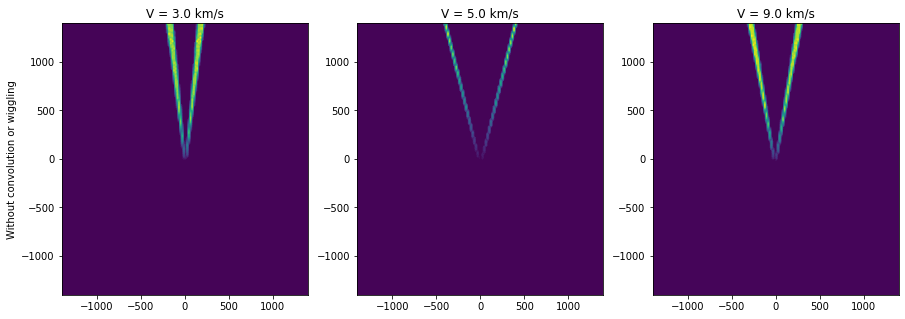

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import axoproj as ap

# Final datacube informations
ra = np.linspace(-1400,1400,150)
dec = np.linspace(-1400,1400,150)
vrad = np.arange(0,11,0.3) 

# Setting up simple disk wind parameters :

r0_vec = np.array([20])
theta_vec = np.array([15])
vp_vec = np.array([15])
j_vec = np.array([30])

# Creation of the disk wind model
disk_wind = ap.DW_model(r0 = r0_vec, theta = theta_vec, vp = vp_vec, J = j_vec, alpha = 0)

# Setting up maximal height, step in radius and angular position
disk_wind.create_setup(zmax = 2000, step = 1, dphi = 1)

# create datacube with specified P.A and inclination
cube_DW = ap.create_datacube(disk_wind, ra, dec, vrad, incl = 115, pa = 0)


#Imaging on 3 channel maps
fig = plt.figure(figsize = (15,5))
for i,v_val in enumerate([3,5,9]):
    plt.subplot(1,3,i+1)
    if i == 0:
        plt.ylabel("Without convolution or wiggling")
    plt.contourf(ra,dec,cube_DW[:,:,ap.i_near(vrad,v_val)],(50))
    plt.title('V = {:.1f} km/s'.format(v_val))
plt.show()



# Show morphology and dynamics
The morphology and dynamics of the model could be shown using :

/usr/local/anaconda3/envs/work_p3/lib/python3.7/site-packages/numpy/lib/function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


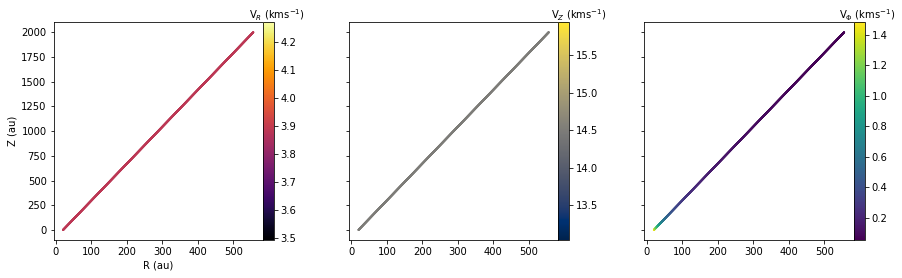

In [2]:
disk_wind.plot_dynamics()

# Spatial/spectral convolution
AxOProj can create a spatial and spectral convolution of the resulting datacube

In [3]:
# create datacube with specified P.A and inclination
cube_DW_conv = ap.create_datacube(disk_wind, ra, dec, vrad, incl = 115, pa = 0,
                                    convolution = {"beamx": 40, "beamy": 40,"beamv":0, "pa":0})

 37%|███▋      | 206975/564289 [00:00<00:00, 1034767.44it/s]

                                                              THE DATA IS 22.0 MB                                                              
                                                        TRANSFORMING INTO PPV OF 6.0 MB                                                        


100%|██████████| 37/37 [00:00<00:00, 266.40it/s]

                                                                  CONVOLUTION                                                                  


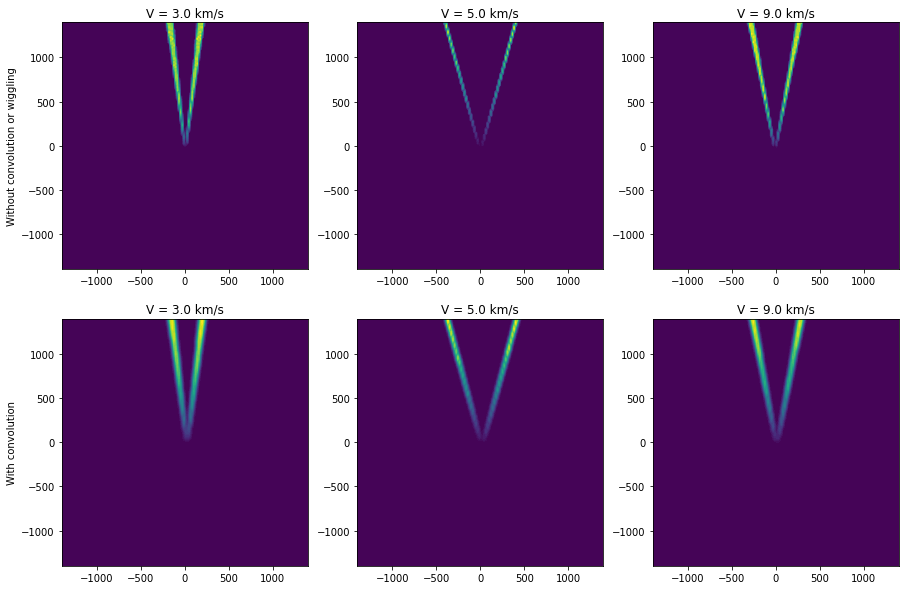

In [4]:
#Imaging on 3 channel maps
fig = plt.figure(figsize = (15,10))
for i,v_val in enumerate([3,5,9]):
    plt.subplot(2,3,i+1)
    if i == 0:
        plt.ylabel("Without convolution or wiggling")
    plt.contourf(ra,dec,cube_DW[:,:,ap.i_near(vrad,v_val)],(50))
    plt.title('V = {:.1f} km/s'.format(v_val))
    plt.subplot(2,3,i+4)
    if i == 0:
        plt.ylabel("With convolution")
    plt.contourf(ra,dec,cube_DW_conv[:,:,ap.i_near(vrad,v_val)],(50))
    plt.title('V = {:.1f} km/s'.format(v_val))

plt.show()

# Precession
AxOProj can also create a simple precession phenomena to the model :

In [5]:
cube_DW_conv_wigg = ap.create_datacube(disk_wind, ra, dec, vrad, incl = 115, pa = 0,
                                    wiggling_param = {"angle":3 , "period": 400, "phi0":0},
                                    convolution = {"beamx": 40, "beamy": 40,"beamv":0, "pa":0})


 38%|███▊      | 210293/554868 [00:00<00:00, 1051338.17it/s]

                                                              THE DATA IS 22.0 MB                                                              
                                                        TRANSFORMING INTO PPV OF 6.0 MB                                                        


100%|██████████| 37/37 [00:00<00:00, 265.91it/s]

                                                                  CONVOLUTION                                                                  


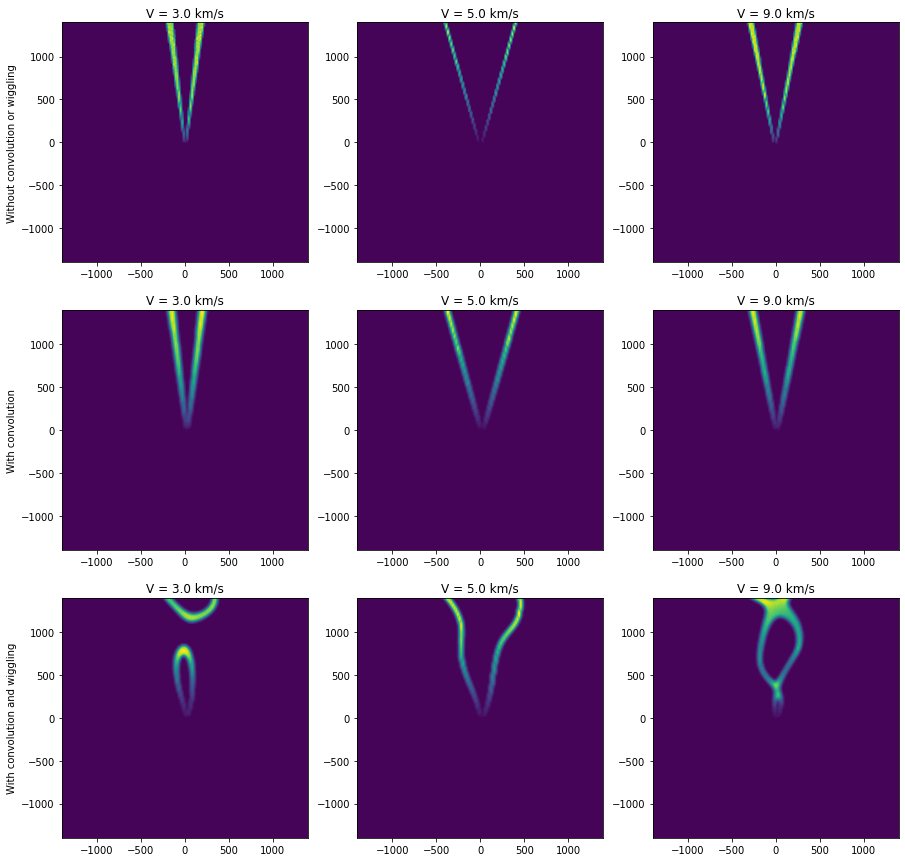

In [6]:
fig = plt.figure(figsize = (15,15))
for i,v_val in enumerate([3,5,9]):
    plt.subplot(3,3,i+1)
    if i == 0:
        plt.ylabel("Without convolution or wiggling")
    plt.contourf(ra,dec,cube_DW[:,:,ap.i_near(vrad,v_val)],(50))
    plt.title('V = {:.1f} km/s'.format(v_val))
    plt.subplot(3,3,i+4)
    if i == 0:
        plt.ylabel("With convolution")
    plt.contourf(ra,dec,cube_DW_conv[:,:,ap.i_near(vrad,v_val)],(50))
    plt.title('V = {:.1f} km/s'.format(v_val))
    plt.subplot(3,3,i+7)
    if i == 0:
        plt.ylabel("With convolution and wiggling")
    plt.contourf(ra,dec,cube_DW_conv_wigg[:,:,ap.i_near(vrad,v_val)],(50))
    plt.title('V = {:.1f} km/s'.format(v_val))
plt.show()